In [1]:
import networkx as nx
import numpy as np
from itertools import combinations
import random

FIRST ATTEMPT: BETWEENNESS CENTRALITY

In [43]:
#number of ways to choose r elements from a set of n elements.
def nCr(n, r):

    return (fact(n) / (fact(r)
                * fact(n - r)))

# Returns factorial of n
def fact(n):
    if n == 0 or n==1:
        return 1
    res = 1

    for i in range(2, n+1):
        res = res * i

    return res

#G = networkx graph
#n = target node

def betweenness_centrality_scratch(G,input_node):

    centrality = 0.00000
    N = len(G)
    iter = nCr(N,2)

    for s,t in combinations(G.nodes(),2):
      if s == input_node or t == input_node:
          continue


      paths = nx.all_shortest_paths(G, source=s, target=t)
      all_paths = list(paths)
      path_count = len(all_paths)

      if path_count == 0:
        continue

      paths_through_input_node = sum(1 for path in paths if input_node in path[1:-1])
      centrality += paths_through_input_node
        

    if nx.is_directed(G) is True:
        factor = 1 / ((N - 1) * (N - 2)) #For a directed network
    else:
        factor = 2 / ((N - 1) * (N - 2)) #For an undirected network

    centrality = centrality * factor


    return centrality


In [50]:
G = nx.gnp_random_graph(10, 0.5)


In [51]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.11342592592592592,
 2: 0.043981481481481476,
 3: 0.041666666666666664,
 4: 0.0648148148148148,
 5: 0.0324074074074074,
 6: 0.006944444444444444,
 7: 0.22453703703703698,
 8: 0.006944444444444444,
 9: 0.02546296296296296}

In [53]:
betweenness_centrality_scratch(G,7)

0.0

The function is not able to calculate betweenness centrality as expected. Due to time contstraints I switched to closeness centrality. Th efollowing function takes into account both Qs 3 a and b. 

In [2]:
def closeness_centrality_from_scratch(G, input_node):

    centrality = 0
    N = G.number_of_nodes()  # Total number of nodes in the graph

    if input_node not in G.nodes():
      print("Input node not found in the graph.")
      return None

    if not isinstance(G, nx.Graph):
      print("Input graph is not a NetworkX object.")
      return None

    is_connected = nx.is_connected(G)
    if not is_connected:
      print("Input graph is not connected.")
      return None

    if N <= 1:
      print("Input graph has less than 2 nodes.")
      return None

    # Compute shortest paths from input_nodeto all other nodes
    shortest_paths = nx.shortest_path_length(G, source=input_node)
    #print( shortest_paths)

        # Sum the lengths of the shortest paths
    total_distance = sum(shortest_paths.values())
    #print(total_distance)

        # Closeness centrality calculation (ignoring disconnected components)
    if total_distance > 0 and N > 1:
        centrality = (N - 1) / total_distance
    else:
        centrality = 0.0  # In case the node is isolated

    return centrality

In [3]:
G = nx.gnp_random_graph(10, 0.5)

In [4]:
closeness_centrality_from_scratch(G,1)

0.6923076923076923

In [5]:
nx.closeness_centrality(G)

{0: 0.6428571428571429,
 1: 0.6923076923076923,
 2: 0.75,
 3: 0.6,
 4: 0.75,
 5: 0.45,
 6: 0.6428571428571429,
 7: 0.75,
 8: 0.75,
 9: 0.6428571428571429}

In [94]:
#Testing on a weighted graph 
Gw = nx.Graph()

Gw.add_edge("a", "b", weight=0.6)
Gw.add_edge("a", "c", weight=0.2)
Gw.add_edge("c", "d", weight=0.1)
Gw.add_edge("c", "e", weight=0.7)
Gw.add_edge("c", "f", weight=0.9)
Gw.add_edge("a", "d", weight=0.3)

In [95]:
nx.closeness_centrality(Gw)

{'a': 0.7142857142857143,
 'b': 0.45454545454545453,
 'c': 0.8333333333333334,
 'd': 0.625,
 'e': 0.5,
 'f': 0.5}

In [98]:
closeness_centrality_from_scratch(Gw,"a")

0.7142857142857143

In [108]:
#Testing a directed graph 
Gs = nx.complete_graph(3, create_using=nx.DiGraph)

Gs.add_edges_from(edgelist)


In [109]:
nx.closeness_centrality(Gs)

{0: 1.0, 1: 1.0, 2: 1.0}

In [110]:
closeness_centrality_from_scratch(Gs,1)

NetworkXNotImplemented: not implemented for directed type

In [116]:
#Testing undirected graph with selfloops
Gl = nx.gnp_random_graph(10, 0.5)
edgelist = [(1, 1), (2, 2)]
Gl.add_edges_from(edgelist)


In [117]:
nx.closeness_centrality(Gl)

{0: 0.6923076923076923,
 1: 0.75,
 2: 0.6923076923076923,
 3: 0.6923076923076923,
 4: 0.6428571428571429,
 5: 0.75,
 6: 0.75,
 7: 0.75,
 8: 0.6923076923076923,
 9: 0.6428571428571429}

In [118]:
closeness_centrality_from_scratch(Gl,1)

0.75

To test the centrality function for robustness

In [119]:
def test_centrality(your_function):
    #We start by defining the test cases 
    test_cases = [
        ("Empty Graph", nx.Graph()),
         ("Directed Graph", nx.complete_graph(5, create_using=nx.DiGraph)),
         ("Path Graph", nx.path_graph(5)),
         ("Disconnected Components", nx.Graph([(0, 1), (2, 3),(4,5)])),
    ]
    for test_name, G in test_cases:
        print(f"\nTest Case: {test_name}")
        if G.number_of_nodes() == 0:
            print("Graph is empty.")
            continue
        for node_i in G.nodes():
            try:
                centrality = your_function(G, node_i)
                print(f"Node {node_i}: Centrality = {centrality}")
            except Exception as e:
                print(f"Error for node {node_i}: {e}")



In [120]:
test_centrality(closeness_centrality_from_scratch)


Test Case: Empty Graph
Graph is empty.

Test Case: Directed Graph
Error for node 0: not implemented for directed type
Error for node 1: not implemented for directed type
Error for node 2: not implemented for directed type
Error for node 3: not implemented for directed type
Error for node 4: not implemented for directed type

Test Case: Path Graph
Node 0: Centrality = 0.4
Node 1: Centrality = 0.5714285714285714
Node 2: Centrality = 0.6666666666666666
Node 3: Centrality = 0.5714285714285714
Node 4: Centrality = 0.4

Test Case: Disconnected Components
Input graph is not connected.
Node 0: Centrality = None
Input graph is not connected.
Node 1: Centrality = None
Input graph is not connected.
Node 2: Centrality = None
Input graph is not connected.
Node 3: Centrality = None
Input graph is not connected.
Node 4: Centrality = None
Input graph is not connected.
Node 5: Centrality = None


In [121]:
test_centrality(nx.closeness_centrality)


Test Case: Empty Graph
Graph is empty.

Test Case: Directed Graph
Node 0: Centrality = 1.0
Node 1: Centrality = 1.0
Node 2: Centrality = 1.0
Node 3: Centrality = 1.0
Node 4: Centrality = 1.0

Test Case: Path Graph
Node 0: Centrality = 0.4
Node 1: Centrality = 0.5714285714285714
Node 2: Centrality = 0.6666666666666666
Node 3: Centrality = 0.5714285714285714
Node 4: Centrality = 0.4

Test Case: Disconnected Components
Node 0: Centrality = 0.2
Node 1: Centrality = 0.2
Node 2: Centrality = 0.2
Node 3: Centrality = 0.2
Node 4: Centrality = 0.2
Node 5: Centrality = 0.2


Qs 4] 

In [54]:
from IPython.display import display, HTML
import requests
from bs4 import BeautifulSoup
import random
import re
import matplotlib.pyplot as plt

In [55]:
def course_prereq(dept_html):
    course_dict = {}
    
    soup = BeautifulSoup(dept_html, 'html.parser')
    col_content_div = soup.find('div', id="col-content")
    coursedesc = col_content_div.find("div", class_="sc_sccoursedescs")
    if coursedesc:
        courseblocks = coursedesc.find_all("div", class_="courseblock")
        for courseblock in courseblocks:
            # Find prerequisites inside courseblockextra
            courseblock_extra = courseblock.find("p", class_="courseblockextra")
            if courseblock_extra and "Prerequisite" in courseblock_extra.text:
                # Find all prerequisite links (a tags)
                prereq_links = courseblock_extra.find_all("a")
                prereq_courses = []
                for link in prereq_links:
                    # Extract the course code from the href attribute (after '?P=')
                    href = link.get('href')
                    prereq_course_code = href.split('?P=')[-1]  # Get the course code from the query string
                    prereq_course_code = re.sub(r'20|%', '', prereq_course_code).strip()
                    prereq_courses.append(prereq_course_code)
                    # Join the course codes when multiple prerequisites exist
                    prerequisites = ' , '.join(prereq_courses)
            
                    # Get the course code for the current course
                    c_title = courseblock.find("p", class_="courseblocktitle")
                    if c_title:
                        # Extract the course code from the title
                        # Assuming the course code is the first part before a period
                        course_code = c_title.text.split('.')[0].strip()  # Extract course code before the first period
                        course_code = course_code.replace('\xa0', '') 
                        course_dict[course_code] = prerequisites
    
    return course_dict

In [56]:
dept_html = requests.get('https://catalog.northeastern.edu/course-descriptions/jrnl/').text
course_dict = course_prereq(dept_html)
course_dict

{'JRNL2200': 'ENGW1102 , ENGW1111',
 'JRNL2201': 'JRNL1101',
 'JRNL2301': 'ENGW1111 , ENGW1102',
 'JRNL2350': 'ENGW1111 , ENGW1102',
 'JRNL4370': 'COMM1450 , JRNL1101 , JRNL3370',
 'JRNL5314': 'JRNL21',
 'JRNL6201': 'JRNL60',
 'JRNL6307': 'JRNL6306'}

Visualization of the pre-requisites to courses connectivity for this department. 

In [57]:
def generate_course_network(course_dict):
    
    G = nx.DiGraph()

    # Iterate over the course dictionary
    for course, prereqs in course_dict.items():
        # Split prerequisites if they are joined by 'or'
        prereq_list = prereqs.split(' , ')
        
        # Add an edge from each prerequisite to the course
        for prereq in prereq_list:
            # Clean up the prerequisite URLs (optional, depending on how you store them)
            prereq_cleaned = prereq.split('?P=')[-1]  # Extract course code from the URL
            G.add_edge(prereq_cleaned, course)

    return G

def visualize_course_network(G):
    # Draw the graph
    pos = nx.spring_layout(G, k=3, iterations=100)  # Spring layout for a clean visualization
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=3000, font_size=6, arrowsize=20)
    plt.title("Course-Prerequisite Network")
    plt.show()

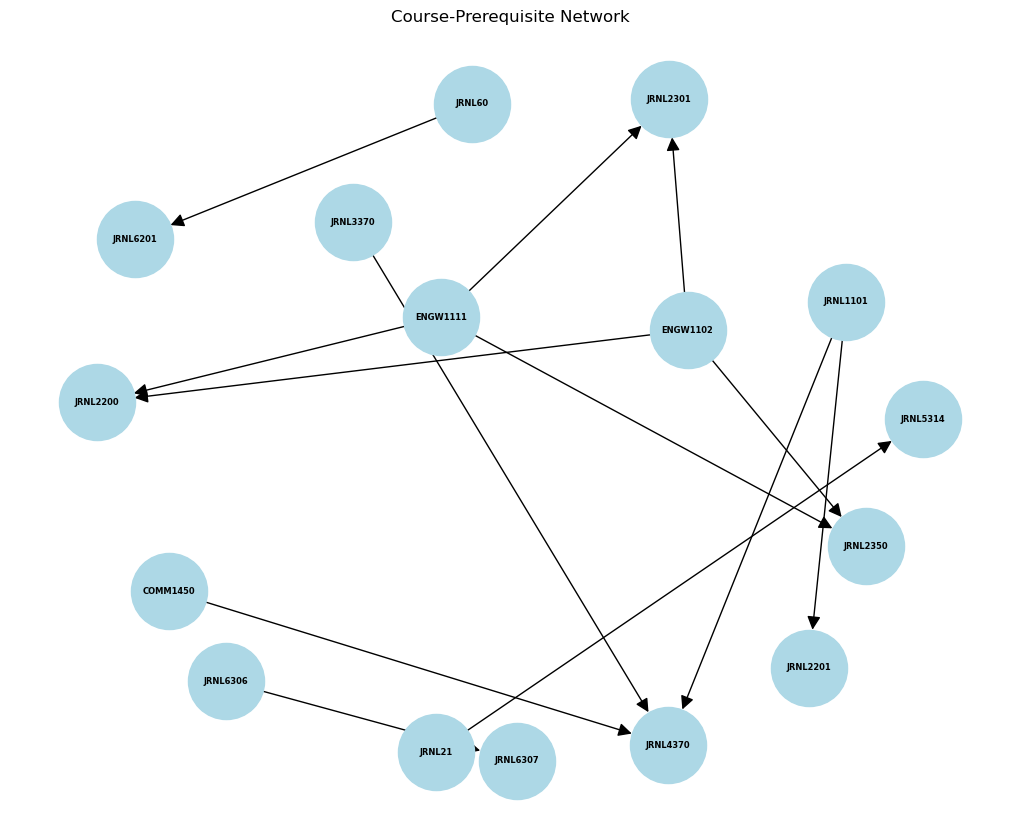

In [58]:
G = generate_course_network(course_dict)
visualize_course_network(G)

To generate a network of the entire curriculum 

In [59]:
catalog_res = requests.get('https://catalog.northeastern.edu/course-descriptions/')
catalog_html = catalog_res.text
soup = BeautifulSoup(catalog_html)
soup_alpha_div = soup.find('div', id="atozindex")
department_hrefs = []
for ul in soup_alpha_div.find_all('ul'):
    for li in ul.find_all('li'):
        department_hrefs.append(li.a.get('href'))

all_depts = []
for url in department_hrefs:
    dept = 'https://catalog.northeastern.edu' + url
    all_depts.append(dept)

#all_depts

In [60]:
def fetch_html(url):
    """
    Fetch the HTML content of a given URL.
    """
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print(f"Failed to fetch {url}")
        return None

def all_dept_prereq(url_list):
    """
    Iterate over a list of URLs, fetch HTML content, and generate combined course-prerequisite dictionaries.
    """
    curriculum_dict = {}

    # Loop over each URL
    for url in url_list:
        html_content = fetch_html(url)
        if html_content:
            # Generate the course-prerequisite dictionary for this page
            #print(html_content)
            course_dict = course_prereq(html_content)
            
            # Merge the dictionaries into the combined dictionary
            curriculum_dict.update(course_dict)
    
    return curriculum_dict


In [61]:
curriculum_dict = all_dept_prereq(all_depts)

In [62]:
curriculum_dict

{'ACCT2301': 'ACCT11 , ACCT19',
 'ACCT3304': 'ACCT2301',
 'ACCT3401': 'ACCT2301',
 'ACCT3402': 'ACCT2301',
 'ACCT3403': 'ACCT2301',
 'ACCT3416': 'ACCT2301',
 'ACCT4412': 'ACCT3401',
 'ACCT4414': 'ACCT2301',
 'ACCT4501': 'ACCT3401',
 'ACCT5204': 'ACCT51',
 'ACCT5220': 'ACCT2301 , ACCT67',
 'ACCT5232': 'ACCT5230 , ACCT5230',
 'ACCT6201': 'ACCT60',
 'ACCT6204': 'ACCT63',
 'ACCT6221': 'ACCT62',
 'ACCT6222': 'ACCT6221',
 'ACCT6223': 'ACCT6221',
 'ACCT6224': 'ACCT6221',
 'ACCT6226': 'ACCT6221',
 'ACCT6227': 'ACCT6221',
 'ACCT6228': 'ACCT6221',
 'ACCT6231': 'ACCT5230 , ACCT5230',
 'ACCT6235': 'ACCT5230 , ACCT5230',
 'ACCT6239': 'ACCT5230 , ACCT5230',
 'ACCT6240': 'ACCT6231 , ACCT6235',
 'ACCT6241': 'ACCT6231 , ACCT6235',
 'ACCT6243': 'ACCT6231 , ACCT6235',
 'ACCT6250': 'ACCT5232',
 'ACCT6273': 'ACCT6272',
 'ACC3201': 'ACC2100',
 'ACC3202': 'ACC31',
 'ACC3330': 'ACC32',
 'ACC3410': 'ACC31',
 'ACC4320': 'ACC32 , FIN3310 , ACC3410',
 'ACC4410': 'ACC3410',
 'ACC4420': 'ACC32 , ACC3410',
 'ACC6230

In [63]:
Gc = generate_course_network(curriculum_dict)

In [64]:
len(Gc)

3259

In [65]:
#course with maximum prerequisites 
max_in_degree_node = max(Gc.in_degree(), key=lambda x: x[1])
# Print the node and its in-degree
print(f"Node with maximum in-degree: {max_in_degree_node[0]}, In-degree: {max_in_degree_node[1]}")

Node with maximum in-degree: PHTH4202, In-degree: 20


In [68]:
nx.find_cycle(Gc)
cycle = nx.find_cycle(Gc)
Gc.remove_edges_from(cycle)

In [67]:
Gc.remove_edges_from(nx.selfloop_edges(Gc))

In [75]:
#The longest chain of prerequisites
nx.dag_longest_path(Gc)
# nx.dag_longest_path_length(Gc)

['CHEM1211',
 'CHEM1214',
 'CHEM2311',
 'CHEM2313',
 'PHSC3411',
 'PHSC3412',
 'PHSC3430',
 'PHMD4621',
 'PHMD4631',
 'PHMD4641']

['CHEM1211', 'CHEM1214', 'CHEM2311', 'CHEM2313', 'PHSC3411', 'PHSC3412', 'PHSC3430', 'PHMD4621', 'PHMD4631', 'PHMD4641']


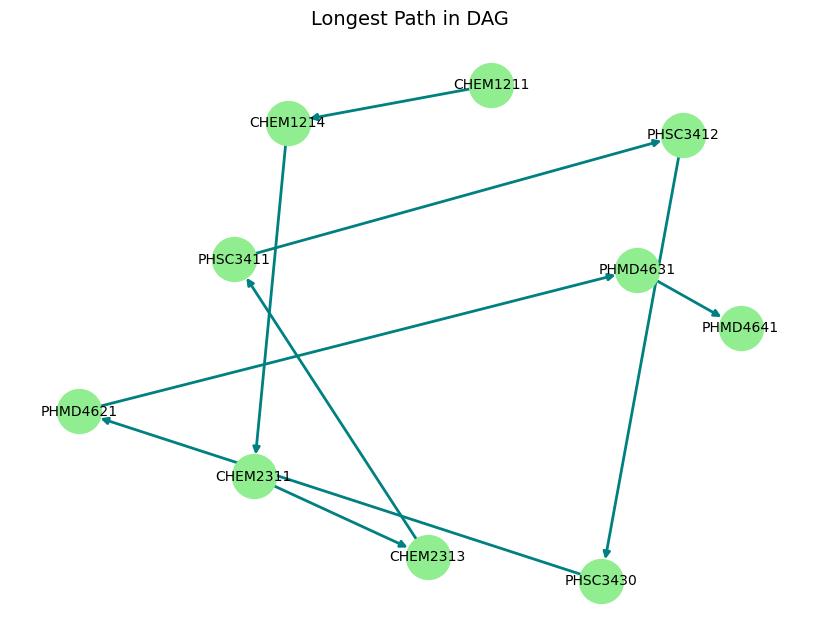

In [85]:
longest_path = nx.dag_longest_path(Gc)
print(longest_path)

longest_path_edges = list(zip(longest_path, longest_path[1:]))
LG = Gc.edge_subgraph(longest_path_edges).copy()

pos = nx.spring_layout(LG, k=2, iterations=10) 
plt.figure(figsize=(8, 6))

# Draw the nodes and edges for the longest path only
nx.draw(LG, pos, with_labels=True, node_color="lightgreen", node_size=1000, font_size=10, arrows=True, edge_color='teal', width=2)


plt.title("Longest Path in DAG", fontsize=14)
plt.savefig('longest_path.png', bbox_inches='tight')
plt.show()

Qs 5] Generating a network of CS PhD students collaborations 

In [86]:
import networkx as nx
from scipy.io import mmread

# Load the matrix market file (.mtx)
file_path = 'ca-CSphd.mtx'
edges = []
with open(file_path, 'r') as f:
    for line in f:
        if line.startswith('%'):  # Skip comment lines starting with '%'
            continue

        u, v = map(int, line.split())
        edges.append((u, v))

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)
G = G.to_undirected()

In [87]:
def degree_distribution(G, number_of_bins=15, log_binning=True, density=True, directed=False):
   
    # Step 0: Do we want the directed or undirected degree distribution?
    if directed:
        if directed=='in':
            k = list(dict(G.in_degree()).values()) # get the in degree of each node
        elif directed=='out':
            k = list(dict(G.out_degree()).values()) # get the out degree of each node
        else:
            out_error = "Help! if directed!=False, the input needs to be either 'in' or 'out'"
            print(out_error)
            # Question: Is this the correct way to raise an error message in Python?
            #           See "raise" function...
            return out_error
    else:
        k = list(dict(G.degree()).values()) # get the degree of each node


    # Step 1: We will first need to define the support of our distribution
    kmax = np.max(k)    # get the maximum degree
    kmin = 0            # let's assume kmin must be 0


    # Step 2: Then we'll need to construct bins
    if log_binning:
        # array of bin edges including rightmost and leftmost
        bins = np.logspace(0, np.log10(kmax+1), number_of_bins+1)
    else:
        bins = np.linspace(0, kmax+1, num=number_of_bins+1)


    # Step 3: Then we can compute the histogram using numpy
    probs, _ = np.histogram(k, bins, density=density)


    # Step 4: Return not the "bins" but the midpoint between adjacent bin
    #         values. This is a better way to plot the distribution.
    bins_out = bins[1:] - np.diff(bins)/2.0
    
    return bins_out, probs

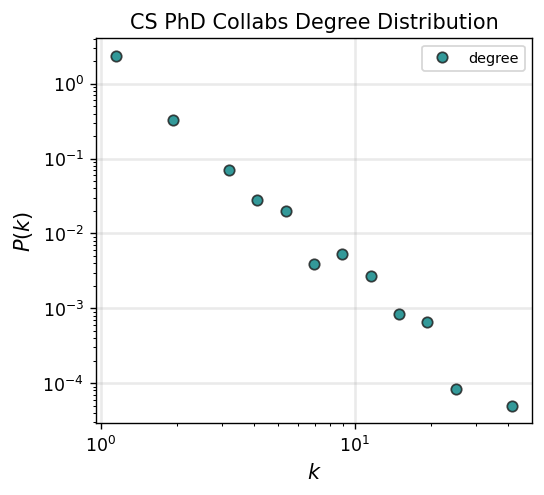

In [88]:
x, y = degree_distribution(G)
fig, ax = plt.subplots(1,1,figsize=(4.5,4),dpi=125)

ax.loglog(x, y,'o', color='teal', label='degree', alpha=0.8, mec='.1')


ax.set_xlabel(r"$k$",fontsize='large')
ax.set_ylabel(r"$P(k)$",fontsize='large')
ax.legend(fontsize='small')
ax.grid(linewidth=1.5, color='#999999', alpha=0.2, linestyle='-')
ax.set_title('CS PhD Collabs Degree Distribution')


plt.savefig('CS PhD Collabs Degree Distribution.png', dpi=425, bbox_inches='tight')
plt.savefig('CS PhD Collabs Degree Distribution.pdf', bbox_inches='tight')
plt.show()

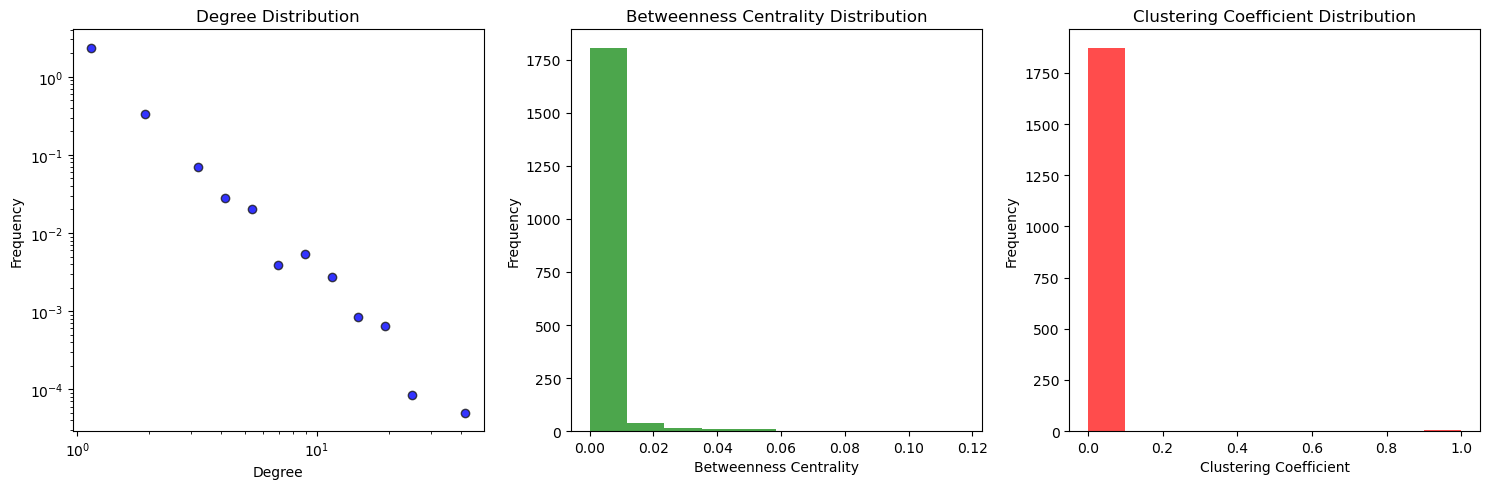

In [89]:
x, y = degree_distribution(G)

# Betweenness centrality distribution
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_values = list(betweenness_centrality.values())

# Clustering coefficient distribution
clustering_coefficient = nx.clustering(G)
clustering_values = list(clustering_coefficient.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Degree distribution
axs[0].loglog(x, y,'o', color='b', label='degree', alpha=0.8, mec='.1')
axs[0].set_title('Degree Distribution')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Frequency')

# Plot 2: Betweenness centrality distribution
axs[1].hist(betweenness_values, bins=10, color='g', alpha=0.7)
axs[1].set_title('Betweenness Centrality Distribution')
axs[1].set_xlabel('Betweenness Centrality')
axs[1].set_ylabel('Frequency')

# Plot 3: Clustering coefficient distribution
axs[2].hist(clustering_values, bins=10, color='r', alpha=0.7)
axs[2].set_title('Clustering Coefficient Distribution')
axs[2].set_xlabel('Clustering Coefficient')
axs[2].set_ylabel('Frequency')

# Step 4: Display the plots
plt.tight_layout()
plt.savefig('CS PhD Collabs dd,bc,cc original.png', dpi=425, bbox_inches='tight')
plt.savefig('CS PhD Collabs dd,bc,cc original.pdf', bbox_inches='tight')
plt.show()

In [90]:
from collections import Counter

def configuration_model_from_degree_sequence(degree_sequence, return_simple=True):

    # Check if the degree sequence is valid (sum of degrees must be even)
    if sum(degree_sequence) % 2 != 0:
        raise ValueError("The sum of the degree sequence must be even.")

    # Create stubs list: node i appears degree_sequence[i] times
    stubs = []
    for node, degree in enumerate(degree_sequence):
        stubs.extend([node] * degree)

    # Shuffle stubs to randomize the pairing process
    np.random.shuffle(stubs)

    # Initialize an empty multigraph
    G = nx.MultiGraph()

    # Add nodes to the graph
    G.add_nodes_from(range(len(degree_sequence)))

    # Pair stubs to create edges
    while stubs:
        u = stubs.pop()
        v = stubs.pop()

        # Add the edge to the graph
        G.add_edge(u, v)

    if return_simple:
        # Convert the multigraph to a simple graph (remove parallel edges and self-loops)
        G_simple = nx.Graph(G)  # This removes parallel edges and self-loops by default

        return G_simple

    else:
        return G

In [91]:
G_randomized = configuration_model_from_degree_sequence(list(dict(G.degree()).values()),return_simple=True)



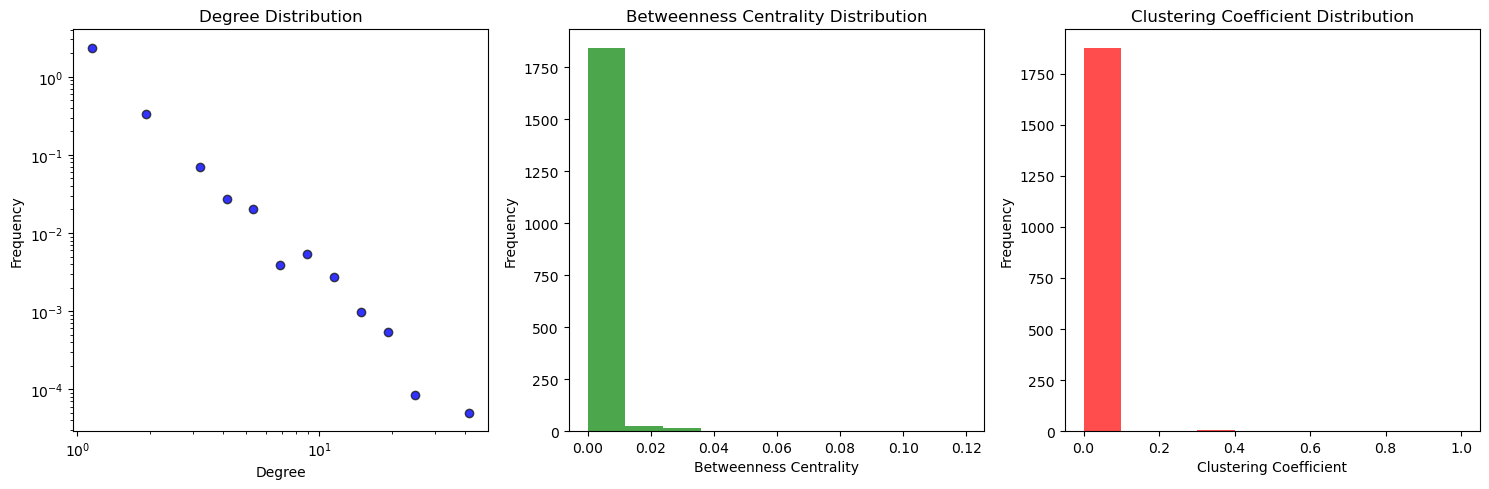

In [92]:
x, y = degree_distribution(G_randomized)

# Betweenness centrality distribution
betweenness_centrality = nx.betweenness_centrality(G_randomized)
betweenness_values = list(betweenness_centrality.values())

# Clustering coefficient distribution
clustering_coefficient = nx.clustering(G_randomized)
clustering_values = list(clustering_coefficient.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Degree distribution
axs[0].loglog(x, y,'o', color='b', label='degree', alpha=0.8, mec='.1')
axs[0].set_title('Degree Distribution')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Frequency')

# Plot 2: Betweenness centrality distribution
axs[1].hist(betweenness_values, bins=10, color='g', alpha=0.7)
axs[1].set_title('Betweenness Centrality Distribution')
axs[1].set_xlabel('Betweenness Centrality')
axs[1].set_ylabel('Frequency')

# Plot 3: Clustering coefficient distribution
axs[2].hist(clustering_values, bins=10, color='r', alpha=0.7)
axs[2].set_title('Clustering Coefficient Distribution')
axs[2].set_xlabel('Clustering Coefficient')
axs[2].set_ylabel('Frequency')

# Step 4: Display the plots
plt.tight_layout()
plt.savefig('CS PhD Collabs dd,bc,cc random.png', dpi=425, bbox_inches='tight')
plt.savefig('CS PhD Collabs dd,bc,cc random.pdf', bbox_inches='tight')
plt.show()